# Multi-Objective Optimization over a set of given datas

## Abstract
In optimization, multiple objectives and constraints cannot be handled independently of the underlying optimizer. Requirements such as continuity and differentiability of the cost surface add yet another conflicting element to the decision process. While “better” solutions should be rated higher than “worse” ones, the resulting cost landscape must also comply with such requirements. Evolutionary algorithms (EA’s), which have found application in many areas not amenable to optimization by other methods, possess many characteristics desirable in a
multiobjective optimizer, most notably the concerted handling of multiple candidate solutions. However, EA’s are essentially unconstrained search techniques which require the assignment
of a scalar measure of quality, or fitness, to such candidate solutions. After reviewing current evolutionary approaches to multiobjective and constrained optimization, the paper proposes
2 practical applications: 'The design of a cantilever beam' and 'A finance optimization of a portfolio'. The first one is a problem from civil engineering, where a compromize of 2 variables has to be decided, and the second one is from finance. A main goal of this paper is to show that multiobjective optimization can be applied to a very high range of common problems in real life.

## First Chapter
### 1.1 Introduction
Practical problems are always characterized by several non-commensurable and often competing measures of performance, or objectives. The multiobjective optimization problem is, without loss of generality, the problem of simultaneously minimizing the n components $ f_k , k=1,…, n $ of a possibly non linear vector function f of a general decision variable x in an universe U, where $$ \mathbf{f}(x) = ((f_1 (x),...,f_n (x)) $$ The problem usually has no unique, perfect solution, but a set of nondominated, alternative solutions, known as the Pareto-optimal set. Still assuming a minimization problem, dominance is defined as follow. *\textbf{Definition 1 (Pareto Dominance)}: A given vector $ \mathbf{u} = (u_1 , … , u_N) $ is said to dominate $ \mathbf{v} = (v_1 , … , v_N) $ if and only if u is partially less than $ \mathbf{v} ( u_p < v ) $. As follow.

$$ \forall i \in (1, ..., n)\rightarrow u_i \leq v_i \wedge \exists i \in (1, ...,n)\rightarrow u_i \leq v_i $$ <br>*Definition 2 (Pareto Optimality)*: A solution $\mathbf{x_u} \in \mathbf{U}$ is said to be Pareto-optimal if and only if there is no $\mathbf{x_v} \in \mathbf{U}$ for which $\mathbf{v} = f ( \mathbf{x_v} ) =(v_1 , … , v_N)$ dominates $\mathbf{u} = f ( \mathbf{x_u} ) =(u_1 , … , u_N)$.
Pareto optimal solution are also called efficient, nondominated and noninferior solutions. The corresponding objective vectors are simply called nondominated. The set of all non-dominated vectors is known as the nondominated set, or the tradeoff surface of the problem. [1]

### 1.2 – NSGA-II and the reason for improvement of NSGA
The Presence of multiple objectives in a problem, in principle, gives rise to a set of optimal solutions (largely known as Pareto-optimal solutions), instead of a single optimal solution. In the absence of any further information, one of these Pareto-optimal solutions cannot be said to be better than the other. This demands a user to find as many Pareto-optimal solutions as possible. Classical optimization methods (including the multicriterion decision-making methods) suggest converting the multiobjective optimization problem to a single-objective optimization problem by emphasizing one particular Pareto-optimal solution at a time. When such a method is to be used for finding multiple solutions, it has to be applied many times, hopefully finding a different solution at each simulation run. Over the past decade, a number of multiobjective evolutionary algorithms (MOEAs) have been suggested. The primary reason for this is their ability to find multiple Pareto-optimal solutions in one single simulation run. Since evolutionary algorithms (EAs) work with a population of solutions, a simple EA can be extended to maintain a diverse set of solutions. With an emphasis for moving toward the true Pareto-optimal region, an EA can be used to find multiple Pareto-optimal solutions in one single simulation run. The nondominated sorting genetic algorithm (NSGA) was one of the first such EAs. Over the years, the main criticisms of the NSGA approach have been as follows.

*1) High computational complexity of nondominated sorting*<br>
*2) Lack of elitism*<br>
*3) Need for specifying the sharing parameter: $ \sigma_{SHARE}$*<br>

We addressed all of these issues and proposed an improved version of NSGA, which we call NSGA-II. From the simulation results on a number of difficult test problems, we find that NSGA-II outperforms two other contemporary MOEAs: *Pareto-archived evolution strategy* (PAES) and *strength Pareto EA* (SPEA) in terms of finding a diverse set of solutions and in converging near the true Pareto-optimal set. [2] <br> 
The algorithm implemented in Python follows the general outline of a genetic algorithm with a modified mating and survival selection. In NSGA-II, first, individuals are selected frontwise. By doing so, there will be the situation where a front needs to be split because not all individuals are allowed to survive. In this splitting front, solutions are selected based on crowding distance. [3] <br>

![title](images/Picture1.png)

The crowding distance is the Manhatten Distance in the objective space. However, the extreme points are desired to be kept every generation and, therefore, get assigned a crowding distance of infinity.
<div>
<img src="images/Picture2.png" width="300">
</div> <br> <br>
Furthermore, to increase some selection pressure, NSGA-II uses a binary tournament mating selection. Each individual is first compared by rank and then crowding distance. There is also a variant in the original C code where instead of using the rank, the domination criterium between two solutions is used. [3]

### 1.3 – NSGA-III
The basic framework of the proposed many-objective NSGA-II (or NSGA-III) is similar to the original NSGA-II algorithm [2] with significant changes in its selection operator. But, unlike in NSGA-II, the maintenance of diversity among population members in NSGA-III is aided by supplying and adaptively updating a number of well-spread reference points. [5] <br>
In NSGA-III, *we replace the crowding distance operator* with the following approaches (1.3A - to E):

* *Classification of Population Into Nondominated Levels*: All population members from the nondominated front level 1 to level L are first included in $S_t$. If $\mid S_t \mid= N$; no further operations are needed and the next generation is started with $ P_{t+1} = S_t $. For $ \mid S_t \mid > N $, members from one to (L - 1) fronts are already selected, i.e., $ P_{t+1} = U^{L-1}_{i=1} F_i $ , and the remaining $ (K = N - \mid P_{t+1} \mid ) $ population members are chosen from the last front $ F_l $. We describe the remaining selection process in the following subsections.

*  *Determination of Reference Points on a Hyper-Plane*: NSGA-III uses a predefined set of reference points to ensure diversity in obtained solutions. The chosen reference points can either be predefined in a structured manner or supplied preferentially by the user. We use Das and Dennis’s systematic approach that places points on a normalized hyper-plane  - an (M - 1)-dimensional unit simplex - which is equally inclined to all objective axes and has an intercept of one on each axis. If p divisions are considered along each objective, the total number of reference points (H) in an M-objective problem is given by: $$ H = \binom{M+p-1}{p} $$ For example, in a three-objective problem (M = 3), the reference points are created on a triangle with the apex at (1, 0, 0), (0, 1, 0), and (0, 0, 1). For clarity, these reference points (p=4, H=15 points) are shown in Fig. 1. ![title](images/Picture3.png) <br> <br> In the proposed NSGA-III, in addition to emphasizing nondominated solutions, we also emphasize population members that are in some sense associated with each of these reference points\cite{4}. Since the above-created reference points are widely distributed on the entire normalized hyperplane, the obtained solutions are also likely to be widely distributed on or near the Pareto-optimal front. In the case of a user-supplied set of preferred reference points, ideally the user can mark H points on the normalized hyper-plane or indicate any H, M-dimensional vectors for the purpose. The proposed algorithm is likely to find near Pareto-optimal solutions corresponding to the supplied reference points, thereby allowing this method to be used more from the point of view of a combined application of decision-making and many-objective optimization. The procedure is presented in Algorithm 1.
![title](images/Algorithm1.png)
* *Adaptive Normalization of Population Members*: First, the ideal point of the population $S_t$ is determined by identifying the minimum value ($z^{min}_i$) for each objective function i = 1, 2,... ,M in $\cup^t_{\tau=0} S_{\tau}$ and by constructing the ideal point $ \mathbf{z} = (z_{min1} , z_{min2} ,... ,z_{minM} ) $ . Each objective value of $ S_t $ is then translated by subtracting objective $ f_i $ by $z^{min}_i $  so that the ideal point of translated $S_t$ becomes a zero vector. We denote this translated objective as $f’_i(\mathbf{x}) = f_i(\mathbf{x}) - z^{min}_i $. Thereafter, the extreme point $(\mathbf{z}^{i,max})$ in each (i-th) objective axis is identified by finding the solution $(\mathbf{x} \in S_t)$ that makes the corresponding achievement scalarizing function (formed with $ f’_i(\mathbf{x}) $ and a weight vector close to ith objective axis) minimum. These M extreme vectors are then used to constitute an M-dimensional hyper-plane. The intercept ai of the ith objective axis and the linear hyper-plane can then be computed (\textit{see Fig. 2}).
![title](images/Picture4.png) <br> <br>
Special care is taken to handle degenerate cases and nonnegative intercepts. The objective functions can then be normalized as $$f_i^n (\mathbf{x})=\frac{f'_i (\mathbf{x})}{a_i}   , i=1,2....M$$ Note that the intercept on each normalized objective axis is now at $f_i^n = 1$, and a hyper-plane constructed with these intercept points will make  $\Sigma^M_{i=1} f_i^n   = 1$ In the case of structured reference points (H of them), the original reference points calculated using Das and Dennis’s approach already lie on this normalized hyper-plane. In the case of preferred reference points by the user, the reference points are simply mapped onto the above-constructed normalized hyper-plane using (4). Since the normalization procedure and the creation of the hyper-plane is done at each generation using extreme points ever found from the start of the simulation, the proposed NSGA-III procedure adaptively maintains a diversity in the space spanned by the members of St at every generation. This enables NSGA-III to solve problems with a Pareto-optimal front whose objective values may be differently scaled. The procedure is also described in Algorithm 2. <br> <br>
![title](images/Algorithm2.png) <br> <br>
* *Association Operation*: After normalizing each objective adaptively based on the extent of members of $S_t$ in the objective space, we need to associate each population member with a reference point. For this purpose, we define a reference line corresponding to each reference point on the hyper-plane by joining the reference point with the origin. Then, we calculate the perpendicular distance of each population member of $S_t$ from each of the reference lines. The reference point whose reference line is closest to a population member in the normalized objective space is considered to be associated with the population member. This is illustrated in Fig. 3. The procedure is presented in Algorithm 3.
![title](images/Picture5.png) <br> <br>
![title](images/Algorithm3.png) <br> 
* *Niche-Preservation Operation*: It is worth noting that a reference point may have one or more population members associated with it or need not have any population member associated with it. We count the number of population members from $ P_{t+1} = S_t/F_l $ that are associated with each reference point. Let us denote this niche count as $\rho_j$ for the j-th reference point. We now devise a new niche-preserving operation as follows. First, we identify the reference point set $ \mathbf{J}_{min} = {j : argmin_j \rho_j } $ having minimum $\rho_j$ . In the case of multiple such reference points, one $(\mathbf{j^-} \in \mathbf{J}_{min})$ is chosen at random. If $ \rho_j^- = 0$ (meaning that there is no associated $P_{t+1}$ member to the reference point $j^-$), there can be two scenarios with $j^-$ in set $F_l$. First, there exists one or more members in front $F_l$ that are associated with the reference point $j^-$.  In this case, the one having the shortest perpendicular distance from the reference line is added to $P_{t+1}$. The count $\rho_j^-$ for reference point $j^-$ is then incremented by one. Second, the front $F_l$ does not have any member associated with the reference point $j^-$. In this case, the reference point is excluded from further consideration for the current generation. In the event of $\rho_j^- \geq 1$ (meaning that already one member associated with the reference point exists in $S_t/F_l$), a randomly chosen member, if exists, from front $F_l$ that is associated with the reference point j¯ is added to $P_{t+1}$. The count $\rho_j^-$ is then incremented by one. After niche counts are updated, the procedure is repeated for a total of K times (see Section IV-A) to fill all vacant population slots of $P_{t+1}$. The procedure is presented in Algorithm 4. 
![title](images/Algorithm4.png) <br>
* *Genetic Operations to Create Offspring Population*: For a computationally fast procedure, we have set N almost equal to H, thereby expecting to evolve one population member close to the Pareto-optimal front corresponding to each reference point. For all these reasons, we do not employ any explicit reproduction operation with NSGA-III for handling problems with box constraints only. The population $Q_{t+1}$ is constructed by applying the usual crossover and mutation operators by randomly picking parents from $P_{t+1}$. However, to create offspring solutions closer to parent solutions we suggest using a relatively larger value of distribution index in the SBX operator, thereby creating offsprings close to their parents.
* *Computational Complexity of One Generation of NSGA-III*: The nondominated sorting (line 4 in Algorithm 1) of a population of size 2N having M-dimensional objective vectors requires $O(N \log^{M-2} N)$ computations [49]. Identification of the ideal point in line 2 of Algorithm 2 requires a total of $O(MN)$ computations. A translation of objectives (line 3) requires $O(MN)$ computations. However, identification of extreme points (line 4) requires $O(M2N)$ computations. Determination of intercepts (line 6) requires one matrix inversion of size M × M, requiring $O(M3)$ operations. Thereafter, normalization of a maximum of 2N population members (line 7) requires $O(N)$ computations. Line 8 of Algorithm 2 requires $O(MH)$ computations. All operations in Algorithm 3 in associating a maximum of 2N population members to H reference points would require $O(MNH)$ computations. Thereafter, in the niching procedure in Algorithm 4, line 3 will require $O(H)$ comparisons. Assuming that $L = |F_l|$, line 5 requires $O(L)$ checks. Line 8 in the worst case requires $O(L)$ computations. Other operations have smaller complexity. However, the above computations in the niching algorithm need to be performed a maximum of L times, thereby requiring larger of $O(L^2)$ or $O(LH)$ computations. In the worst case scenario ($S_t = F_1$, i.e., the first nondominated front exceeds the population size), $L \leq 2N$. In all of our simulations, we have used $N \approx H$ and usually $N > M$. Taking into account all the above considerations and computations, the overall worst-case complexity of one generation of NSGA-III is $O(N^2 \log^{M-2} N)$ or $O(N^2M)$, whichever is larger.
* *Parameter-Less Property of NSGA-III:* As in NSGA-II, the NSGA-III algorithm does not require setting any new parameter other than the usual GA parameters such as the population size, termination parameter, crossover and mutation probabilities, and their associated parameters. The number of reference points H is not an algorithmic  parameter, as this is directly related to the desired number of trade-off points. The population size N is dependent on H, as $N \approx H$. The location of the reference points is similarly dependent on the preference information that the user is interested to achieve in the obtained solutions. [4]

## Second Chapter
### 2.1 – Pymoo: multi-objective Optimization in Python

The framework offers state of the art single- and multi-objective optimization algorithms and many more features related to multi-objective optimization such as visualization and decision making. Python is required to use this framework:
* Search for “Python” in Microsoft Store and click “Get it”. Instead in Ubuntu or Unix run:<br>
```
sudo apt update
sudo apt install python3-pip
```
* Open a cmd terminal and check if it’s installed with (replace with *python3* in linux):<br>
```python --version ```
* As you will have printed the version you can try running by typing just “*python*” and you should not see warnings. Now do ```exit()``` to close python.
* Check if *pip* is already installed (replace with *pip3* in linux): ```pip help``` . If Yes, and it should be as you already installed Python, go to the next step. Otherwise you will have this error: ![title](images/Picture6.png) So do the following: 
```
curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
python get-pip.py
``` 
Now just re-run  ```pip help``` to check if installed.
  
Pymoo is available on PyPi and can be installed by: [6]<br>
```pip install -U pymoo```  
To check if it’s installed successfully run the following command: [7]  
```python -c "from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())"```

The *pymoo* framework can be run with and without compiled modules. Some computationally more expensive function has been implemented using Cython for speedup. The compilation requires NumPy to be installed because its header files are needed. [8]  
The following scripts provided by the authors are for respectively NSGA-II and NSGA-III implementation:

[Example-NSGA2](data/Example-NSGA2.py)<br>
[Example-NSGA3](data/Example-NSGA3.py)<br><br>
Now, let’s go forward with some practical applications.

### 2.2 – Practical Applications of NSGA-II / NSGA-III algorithms

### 2.2.1 - The design of a cantilever beam

The non-dominated set of what we call the entire feasible search space S is the globally Pareto-optimal set.
Let us consider a cantilever design problem (Figure 1) with two decision variables, i.e. diameter (d) and length (l).<br>
<p style='display: block; text-align: center;'>
    <img src="images/Picture7.png" alt>
    <em>Figure 1: A schematic of a cantilever beam problem</em>
</p><br>
The beam has to carry an end load P. Let us also consider two conflicting objectives of design, i.e. minimization of weight $f_1$ and minimization of end deflection $f_2$. The first objective will resort to an optimum solution having the smaller dimensions of d and 1, so that the overall weight of the beam is minimum. Since the dimensions are small, the beam will not be adequately rigid and the end deflection of the beam will be large. [13] <br>
On the other hand, if the beam is minimized for end deflection, the dimensions of the beam are expected to be large, thereby making the weight of the beam large. For our discussion, we consider two constraints: the developed maximum stress $\sigma_{max}$ is less than the allowable strength $S_y$ and the end deflection b is smaller than a specified limit $\delta_{max}$ . <br>
With all of the above considerations, the following two-objective optimization problem is formulated as follows:<br>
\begin{equation}
\begin{aligned}
\min_{d,l} \quad &  f_1(d,l) = \rho \frac{\pi d^2}{4} l  \\
\min_{d,l} \quad &  f_2(d,l) = \delta = \frac{64 P l^3}{3 E \pi d^4}  \\
\textrm{subject to} \quad & \rho_{max} \leq S_y   \\
& \delta \leq \delta_{max}   \\
\end{aligned}
\end{equation}
where the maximum stress is calculated as follows:
$$\sigma_{max}= \frac{32Pl}{\pi d^3 }$$
The following parameter values are used:
\begin{equation}
\begin{aligned}
\rho = 7800 Kg/m^3 \quad & P = 1 kN  \\
 E = 207 GPa \quad & S_y = 300 MPa  \\
 \delta_{max} = 5 mm   \\
\end{aligned}
\end{equation}

The left plot in Figure 2 marks the feasible decision variable space in the overall search space enclosed by $10 \leq d \leq 50 mm$ and $200 \leq L \leq 1000 mm$. It is clear that not all solutions in the rectangular decision space are feasible. Every feasible solution in this space can be mapped to a solution in the feasible objective space shown in the right plot. The correspondence of a point in the left figure with that in the right figure is also shown.
<p style='display: block; text-align: center;'>
    <img src="images/Picture8.png" alt>
    <em>The left plot is the feasible decision variable space (left) and the right is the feasible objective space (right).</em>
</p><br>

This figure shows many solutions trading-off differently between the two objectives. Any two solutions can be picked from the feasible objective space and compared. For some pairs of solutions, it can be observed that one solution is better than the other in both objectives. For certain other pairs, it can be observed that one solution is better than the other in one objective, but is worse in the second objective. 
In order to establish which solution(s) are optimal with respect to both objectives, let us handpick a few solutions from the search space.
<p style='display: block; text-align: center;'>
    <img src="images/Picture9.png" alt>
    <em>4 Pareto-Optimal solutions and 1 non optimal solution.</em>
</p><br>
Figure 3 is drawn with many such solutions and five of these solutions (marked A to E) are presented in Table 1. Of these solutions, the minimum weight solution (A) has a diameter of 18.94 mm, while the minimum deflection solution (D) has a diameter of 50 mm. It is clear that solution A has a smaller weight, but has a larger end-deflection than solution D. Hence, none of these two solutions can be said to be better than the other with respect to both objectives. When this happens between two solutions, they are called *non-dominated solutions* .<br>

![title](images/Table1.png) <br>

If both objectives are equally important, one cannot say, for sure, which of these two solutions is better with respect to both objectives. There exist many such solutions (all solutions, marked using circles in the figure, are obtained by *using NSGA-II*) in the search space. For clarity, these solutions are joined with a curve in the figure. All solutions lying on this curve are special in the context of multi-objective optimization and are called *Pareto-optimal solutions*. The curve formed by joining these solutions is known as a *Pareto-optimal front*. The same Pareto-optimal front is also marked on the right plot of Figure 3 by a continuous curve. It is interesting to observe that this front lies in the bottom-left corner of the search space for problems where all objectives are to be minimized.

### 2.2.2 – A Finance optimization of a portfolio

Portfolio Design is a complex optimization problem that is concerned with allocating a given capital to a set of stock or capital assets so that the return and the risk of the investment are optimized. The problem belongs to the NP-hard class of computation for which no algorithm exists that can solve the problem running in polynomial time complexity. The complexity of the problem increases even further if the optimization methods need to have a robust estimation of the returns and risks associated with each constituent stock of the portfolio since accurately estimating the future values of stock prices is also a very challenging problem. In fact, the supporters of the efficient market hypothesis advocate that it is impossible to arrive at a precise predicted value of the future prices of a stock. On the other hand, several researchers and financial analysts have demonstrated how the design of smart algorithms and complex models can help one in predicting future stock prices with high precision. After the seminal proposition of Markowitz on portfolio optimization following the minimum-variance approach, several methods have been suggested by researchers for solving the problem . Several approaches are also proposed in the literature for precisely predicting future stock prices including linear and non-linear regression, autoregressive integrated moving average (ARIMA), simple and weighted exponential smoothing, vector autoregression (VAR), machine learning, and deep learning. [14] <br>
To test the following code we need 3 packages, named *pandas, yfinance, yahoofinancials*. So run the following instruction: <br>
```pip list``` <br>
And you should see something similar: <br>
```
autograd  (1.3)
cma    (2.7.0)
cycler  (0.11.0)
fonttools  (4.28.5)
future  (0.18.2)
kiwisolver   (1.3.2)
matplotlib (3.5.1)
numpy (1.21.5)
openpyxl (2.2.0b1)
pandas (0.18.1)
packaging   (21.3)
Pillow  (8.4.0)
pip (21.3.1)
pymoo   (0.5.0)
pyparsing  (3.0.6)
python-dateutil (2.8.2)
scipy (1.7.3)
six  (1.16.0)
```
As it can be seen pandas is installed, otherwise:<br>
```pip install pandas yfinance yahoofinancials```<br>
because often it is a package already included with Python. Now:<br>
```pip install yfinance yahoofinancials```<br>
The following code should be able to plot close prices comparing different tech companies:<br>

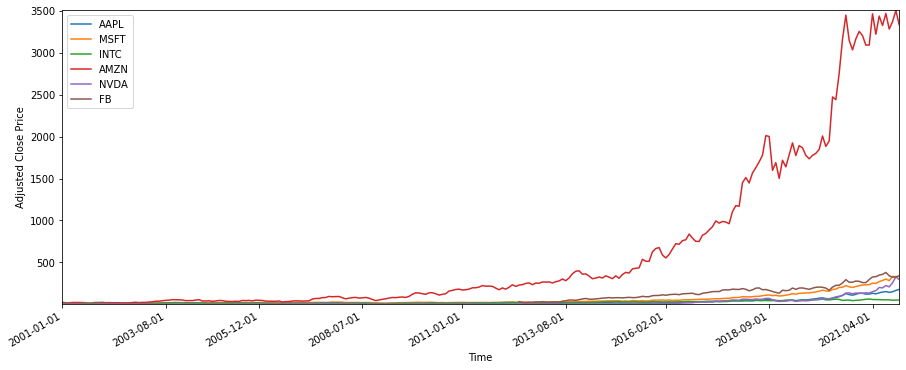

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

def create_plot(stocks):
    # Create an empty dataframe
    yahoo_financials = YahooFinancials(stocks)
    data = yahoo_financials.get_historical_price_data(start_date='2001-01-01', \
                        end_date='2021-12-31', time_interval='monthly')
    # Calculate the close prices
    # for all the months
    close_prices  = pd.DataFrame({stock: {x['formatted_date']: x['adjclose'] \
                                          for x in data[stock]['prices']} \
                                          for stock in stocks})
    plt.figure(figsize=(15,6))
    
    # Plot the returns
    for stock in stocks:
        plt.plot(close_prices[stock],label=stock)
    plt.legend(stocks, loc='upper left')
    # Give the axes labels
    plt.ylabel('Adjusted Close Price')
    plt.xlabel('Time')
    plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
    plt.gcf().autofmt_xdate()
    plt.margins(x=0,y=0)
    plt.show()

stocks = ['AAPL','MSFT','INTC','AMZN','NVDA','FB']
create_plot(stocks)

In finance, a common problem is to choose a portfolio when there are two conflicting objectives — the desire to have the expected value of portfolio returns be as high as possible, and the desire to have risk, often measured by the standard deviation of portfolio returns, be as low as possible. This problem is often represented by a graph in which the efficient frontier shows the best combinations of risk and expected return that are available, and in which indifference curves show the investor's preferences for various risk-expected return combinations.
So we now define our problem [14]: <br>
\begin{equation}
\begin{aligned}\\
\max [ Exp(Ret(P) ] = w_1 (Ret(C_1))+w_2 (Ret(C_2) )  +...+w_n (Ret(C_n) )=\mathbf{w}\cdot \mathbf{Ret(C)} \\
\min [ Variance(P) ]=w_1 (\sigma^2(C_1))+...+w_n (\sigma^2(C_n) ) + w_1 \cdot w_1 \cdot c_{(1,1)} + ...
 w_n \cdot w_m \cdot c_{(n,m)} \\ =  \mathbf{w} \cdot \mathbf{\Sigma} + \mathbf{w} \cdot \mathbf{C}\cdot \mathbf{w^T} \\
\textrm{subject to} \quad
 \sum_i^n w_i \leq 1 \\
Variance(P) \leq 20\% \\
 [ Exp(Ret(P) ] \geq 30 \%
\end{aligned}
\end{equation}

By implementing the code as described in [11] (or NSGA3 as in [10] ) (take the guidelines as reference) you can run the next piece of interactive code.

This repo contains an introduction to [Pymoo](https://pymoo.org/) , 
[YahooFinancials](https://pypi.org/project/yahoofinancials/) and [IPython](https://ipython.org).

Outline of some basics:

* [IPython](https://ipython.org/examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [YahooFinancials module](https://pypi.org/project/yahoofinancials/)
* [Pandas](https://pandas.pydata.org/)
* [Pymoo Getting Started](https://pymoo.org/getting_started/index.html)
* [Pymoo Problems](https://pymoo.org/problems/index.html)
* [Pymoo Algorithms](https://pymoo.org/algorithms/index.html)
* [Pymoo Visualizations](https://pymoo.org/visualization/index.html)


In [19]:
import autograd.numpy as anp
from pymoo.core.problem import Problem

class AssetsOptim(Problem):

    def __init__(self, len, xa, xb, cov):
        super().__init__(n_var=len, n_obj=2,n_constr=3, xl=np.zeros(len), xu=np.ones(len))
        # store our variables
        # in this class
        self.ret = xb
        self.sigma = xa
        self.cov = cov

    def _evaluate(self, x, out,*args, **kwargs):
        r = self.ret
        s = self.sigma
        c = self.cov
        
        f2 = -anp.dot(x,r.T)
        f1 = anp.matmul(x,(s.T)**2)+2*(anp.matmul(x,anp.matmul(c, x.T)).sum(axis=1))
        
        g1 = anp.sum(x, axis=1)-1 
        # sum(x) <= 1 (over columns)
        g2 =  f1 - 0.20          
        # dev.std <= 20%
        g3 = 0.30 + f2           
        # return >= 30%
        out["F"] = anp.column_stack([f1, f2])
        out["G"] = anp.column_stack([g1, g2, g3])
        
        

In [28]:
# preliminary financial functions used to get and plot datas in case you need

# import from system libraries of python
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
from datetime import datetime

# import this module from yahoofinancials library
from yahoofinancials import YahooFinancials

def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "monthly")
    df = pd.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df

# this function take a list of stocks
# and compute some statistical parameters
# as mean or variance for a gaussian distribution
# it uses the "retrieve_stock_data" function in each iteration,
# there is also a plot of the returns in a 10-years period of time

def get_data_for_stocks(stocks):
    str_vol = {}
    str_returns = {}
    L = len(stocks)
    Mean = np.zeros(shape=(L, L),dtype=np.float32)
    
    for index, stock in enumerate(stocks):
        data = retrieve_stock_data(stock, "2011-01-01", "2021-01-01")
        str_returns[stock], mean, m_returns, a_returns = annual_return(data, stock)
        Mean[:,[index]] = np.resize(a_returns, (L,1))
        tdf, tmean, tsigma = stat.t.fit(m_returns)
        str_vol[stock] = annual_volatility(data, stock)
        
        support = np.linspace(m_returns.min(), m_returns.max(), 100)
        m_returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5);
        plt.plot(support, stat.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-")
        plt.title("Monthly returns on "+stock+", 2011-2021", weight="bold");
        plt.show()
    return str_vol, str_returns, np.cov(Mean)


# simple function that compute annual return from montly
# changes of returns, it separes datas in sublists of 12 months
# and print a mean value

def annual_return(data, name):
    returns = data["adjclose"].pct_change().dropna()
    mean = returns.mean()
    n = 12
    returns_sublists = [returns[i:i+n] for i in range(0, len(returns), n)]
    final = [12*np.mean(s) for s in returns_sublists]
    yearly = round(np.array(final).mean(), 4)*100
    print(f"Annual Return for {name}: {yearly:5.2f} %")
    return yearly, mean, returns, final

# simple function that compute annual volatility from montly
# volatility or standard deviation, the formula is 
# "annual_std = sqrt(21)*monthly_std"
# or "annual_std = sqrt(252)*daily_std"

def annual_volatility(data, name):
    data['Log returns'] = np.log(data['close']/data['close'].shift())
    volatility = data['Log returns'].std()*21**.5
    annual_volatility = round(volatility, 4)*100
    print(f"Annual volatility for {name}: {annual_volatility:5.2f} %")
    return annual_volatility

*Initialize our set of datas to optimize:*

Annual Return for AAPL: 29.93 %
Annual volatility for AAPL: 36.05 %


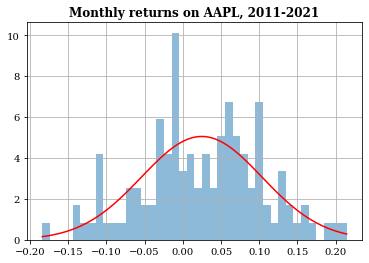

Annual Return for MSFT: 25.56 %
Annual volatility for MSFT: 26.19 %


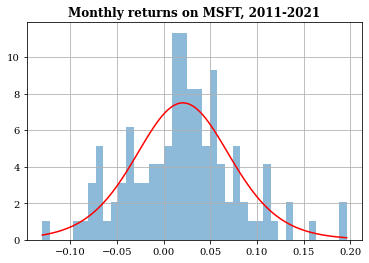

Annual Return for INTC: 14.09 %
Annual volatility for INTC: 30.98 %


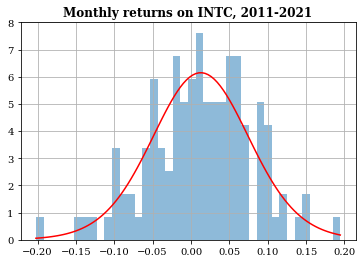

Annual Return for AMZN: 34.16 %
Annual volatility for AMZN: 36.04 %


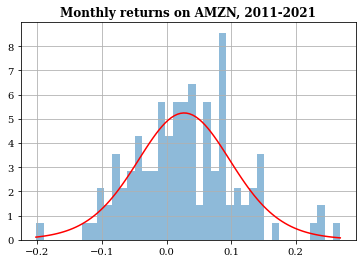

Annual Return for NVDA: 39.82 %
Annual volatility for NVDA: 49.23 %


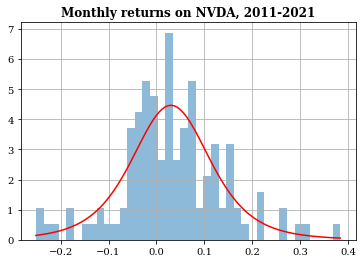

Annual Return for FB: 32.52 %
Annual volatility for FB: 45.81 %


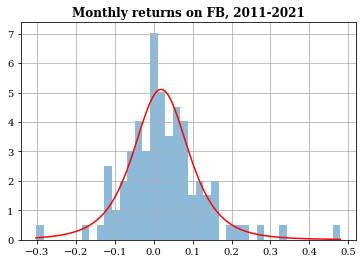

In [29]:
# here our example of 6 stocks (tech stocks)
tech_stocks = ['AAPL','MSFT','INTC','AMZN','NVDA','FB']
#retrieve the datas and also store a covariance matrix in "covariance" object
dict_vol, dict_returns, covariance = get_data_for_stocks(tech_stocks)

*Problem Solver - NSGA-II is chosen:*

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  1.154571972 |  1.89618E+01 |       1 |            - |            -
    2 |     125 |  1.154571972 |  1.25142E+01 |       1 |  0.00000E+00 |            f
    3 |     150 |  0.565196491 |  7.875490361 |       1 |  0.574209490 |        ideal
    4 |     175 |  0.096798039 |  4.804236873 |       1 |  0.267467497 |        ideal
    5 |     200 |  0.096798039 |  3.135109944 |       1 |  0.00000E+00 |            f
    6 |     225 |  0.096798039 |  2.390707479 |       1 |  0.00000E+00 |            f
    7 |     250 |  0.028181876 |  1.898816704 |       1 |  0.120536094 |        ideal
    8 |     275 |  0.028181876 |  1.450343490 |       1 |  0.00000E+00 |            f
    9 |     300 |  0.028181876 |  1.184676824 |       1 |  0.00000E+00 |            f
   10 |     325 |  0.000693181 |  0.930234686 |       1 |  0.030784624 |        ideal
   11 |     350 |  0.000693181 |  0.712177839 |       

   97 |    2500 |  0.00000E+00 |  0.00000E+00 |       4 |  0.444872062 |        ideal
   98 |    2525 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   99 |    2550 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  100 |    2575 |  0.00000E+00 |  0.00000E+00 |       4 |  0.081740466 |            f
  101 |    2600 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  102 |    2625 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  103 |    2650 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  104 |    2675 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  105 |    2700 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  106 |    2725 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  107 |    2750 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  108 |    2775 |  0.00000E+00 |  0.00000E+00 |       

  201 |    5100 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  202 |    5125 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  203 |    5150 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  204 |    5175 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  205 |    5200 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  206 |    5225 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  207 |    5250 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  208 |    5275 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  209 |    5300 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  210 |    5325 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  211 |    5350 |  0.00000E+00 |  0.00000E+00 |       5 |  0.252211062 |        ideal
  212 |    5375 |  0.00000E+00 |  0.00000E+00 |       

  299 |    7550 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  300 |    7575 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  301 |    7600 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  302 |    7625 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  303 |    7650 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  304 |    7675 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  305 |    7700 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  306 |    7725 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  307 |    7750 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  308 |    7775 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  309 |    7800 |  0.00000E+00 |  0.00000E+00 |      10 |  0.00000E+00 |            f
  310 |    7825 |  0.00000E+00 |  0.00000E+00 |      1

  397 |   10000 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  398 |   10025 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  399 |   10050 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  400 |   10075 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  401 |   10100 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  402 |   10125 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  403 |   10150 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  404 |   10175 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  405 |   10200 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  406 |   10225 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  407 |   10250 |  0.00000E+00 |  0.00000E+00 |      16 |  0.00000E+00 |            f
  408 |   10275 |  0.00000E+00 |  0.00000E+00 |      1

  497 |   12500 |  0.00000E+00 |  0.00000E+00 |      12 |  0.00000E+00 |            f
  498 |   12525 |  0.00000E+00 |  0.00000E+00 |      12 |  0.00000E+00 |            f
  499 |   12550 |  0.00000E+00 |  0.00000E+00 |      12 |  0.00000E+00 |            f
  500 |   12575 |  0.00000E+00 |  0.00000E+00 |      12 |  0.00000E+00 |            f


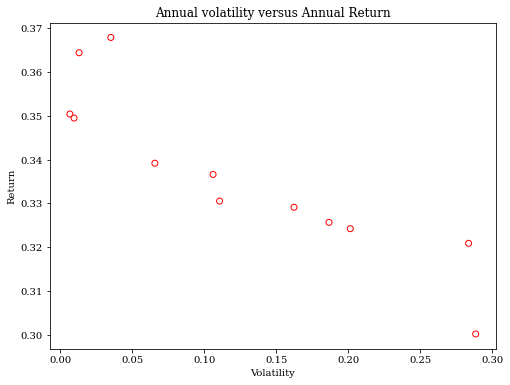

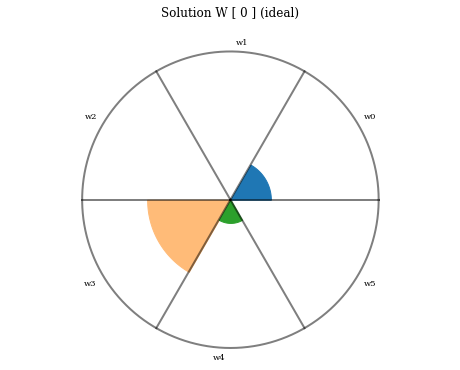

In [30]:
# import from Pymoo Module
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.visualization.petal import Petal

# here we need to convert dictionaries to arrays of real numbers
obj1 = np.divide(np.array(list(dict_vol.values())).astype(float),100)
obj2 = np.divide(np.array(list(dict_returns.values())).astype(float),100)

# problem is an instance of "AssetsOptim" subclass of "Problem"
problem = AssetsOptim(len(tech_stocks), obj1, obj2, covariance)

# definition of our solver algorithm, we are using NSGA-2 with a population
# of 100 items and only some are optima solutions, the trade-off is visible
# eliminate_duplicate is a built-in function of the algorithm that merge
# the parent and offspring population
algorithm = NSGA2(pop_size=100, n_offsprings=25 ,  # ~ O(2500) computational cost
                    sampling=get_sampling("real_random"),
                    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
                    mutation=get_mutation("real_pm", eta=15),
                    eliminate_duplicates=True)
res = minimize(problem, algorithm, ('n_gen', 500), # 500 iterations
               return_least_infeasible=True,   # ~ O(50000) new computational cost
               seed=1,save_history=True,verbose=True) 

# desired weigths are stored in res.X
# desired volatility of the portfolio in res.F[0] and desired return in res.F[1]
# lets do a scatter plot of the solutions. (res.opt is the best results' population)

weights = res.opt.get("X")
plot1 = Scatter(labels=["Volatility", "Return"], title="Annual volatility versus Annual Return")
plot1.add(np.abs(res.opt.get("F")), facecolor="none", edgecolor="red")
#plot1.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot1.show()

# Now just plot the weights, in case one of the optima solution

plot2 = Petal(bounds=[0, 1], cmap="tab20",
             labels=[f"w{i}" for i in range(len(weights[0]))],
             title=("Solution W [ 0 ] (ideal)", {'pad': 20}))
plot2.add(weights[0])
plot2.show()

And then we assumed a population of 100 and defined the solver NSGA-2 as in [9]. Giving a termination threshold of 500 and an offspring of 25 the tradeoff is more clear. The script is attached; then data has been plotted as in [12]. (Figure 4)<br>

<p style='display: block; text-align: center;'>
    <img src="images/Picture10.png" alt>
    <em>Results of a finance optimization problem</em>
</p><br>

[NSGA2_Assets_optimization](data/NSGA2_Assets_optimization.py)<br>